In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl

### This is code for simple GP regression. It assumes a zero mean GP Prior

In [10]:
# This is the true unknown function we are trying to approximate
f = lambda x: (np.sin(0.9*x) + np.cos(0.3*x+.4) - 0.25*(x**2)).flatten()
# f = lambda x: (0.25*(x**2)).flatten()
# f = lambda x: (np.sin(0.9*x)).flatten()

In [11]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1.
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)


In [12]:
N = 9         # number of training points.
n = 100         # number of test points.
σ = 0.015    # noise variance.

In [13]:
# # Sample some input points and noisy versions of the function evaluated at
# # these points. 
# X = np.random.uniform(-5, 5, size=(N,1))
# y = f(X) + s_in*np.random.randn(N)

# K = kernel(X, X)
# L = np.linalg.cholesky(K + s_in*np.eye(N))

# # points we're going to make predictions at.
# Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# # compute the mean at our test points.
# Lk = np.linalg.solve(L, kernel(X, Xtest))
# mu = np.dot(Lk.T, np.linalg.solve(L, y))

# # compute the variance at our test points.
# K_ = kernel(Xtest, Xtest)
# s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
# s = np.sqrt(s2)


# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
# version to tie the ends
# X = np.append(np.random.uniform(-5, 5, size=(N-2)), np.array([-5,5])).reshape((N,1))

y = f(X) + σ*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + σ*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
α = np.linalg.solve(L, y)
μ = np.dot(Lk.T, α)

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

[-5, 5, -3, 3]

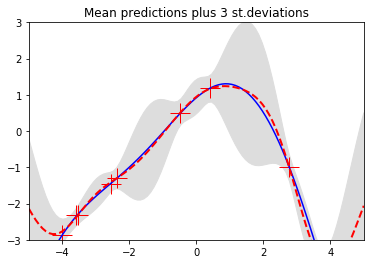

In [14]:
# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, μ-3*s, μ+3*s, color="#dddddd")
pl.plot(Xtest, μ, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])


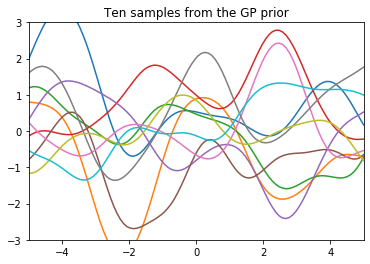

In [15]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

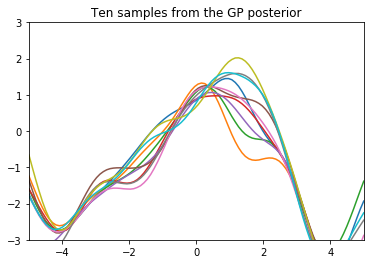

In [16]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = μ.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')